In [3]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [4]:
X, y = make_blobs(random_state = 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [5]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

print("Test set score: {}".format(lr.score(X_test, y_test)))

Test set score: 0.88


訓練セットとテストセットにわける理由は、汎化性能を計測するためであった。

そして、score関数はテストセットにおいてどれだけ正しく分類されたかを見るものであった。

- これから、より頑健な汎化性能評価手法を見ていく。

# 交差検証

- 交差検証では、データの分割を繰り返し行い、複数のモデルを訓練していく。

もっとも多く用いられる交差検証は、`k分割交差検証`である。
kというパラメータは自分で設定する。(多くの場合、5~10回程度)

方法は次のとおりである。<br>
k分割をする

1.データをk個のほぼ同じサイズに分ける。(これを分割と呼ぶ)<br>
2.最初のモデルでは、1つ目のデータをテストセットとし、残り(2~k)を訓練セットとする。<br>
3.次のモデルは、2つ目のデータをテストセットとし、残り(1, 3~k)を訓練セットとする。<br>
4.この操作をk回繰り返す。

In [8]:
import mglearn
import matplotlib.pyplot as plt

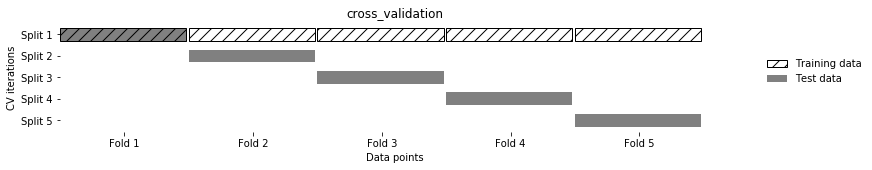

In [7]:
mglearn.plots.plot_cross_validation()
plt.show()

## scikit-learnでの交差検証

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
lr = LogisticRegression()

scores3 = cross_val_score(lr, iris.data, iris.target)
print("cross-validation score: {}".format(scores3))

cross-validation score: [ 0.96078431  0.92156863  0.95833333]


cross_val_scoreはデフォルトではk=3となる。<br>
cvパラメータによって、kを変更できる。

In [9]:
scores5 = cross_val_score(lr, iris.data, iris.target, cv = 5)
print("cross-validation score: {}".format(scores5))

cross-validation score: [ 1.          0.96666667  0.93333333  0.9         1.        ]


In [10]:
print("Average 3-cross-validation scrore:{:.5f}".format(scores3.mean()))
print("Average 5-cross-validation scrore:{:.5f}".format(scores5.mean()))

Average 3-cross-validation scrore:0.94690
Average 5-cross-validation scrore:0.96000


## 交差検証の利点

- メリット
    - モデルが最良の時と最悪の時でどれほどの振れ幅があるかというのが分かる。
    - データをより効率的に使える
- デメリット
    - 単純な分割の場合と比べて、k倍の時間がかかる。

## 層化k分割交差検証と他の戦略

In [11]:
print("Iris labels:\n{}".format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


最初の1/3は0、次の1/3は1、最後の1/3は2となっている。<br>
これに対してk分割交差検証を行うと、毎回違うラベルが入ることになるので、精度は0になってしまうだろう。<br>

こういう場合に、`層化k分割交差検証`を用いる。

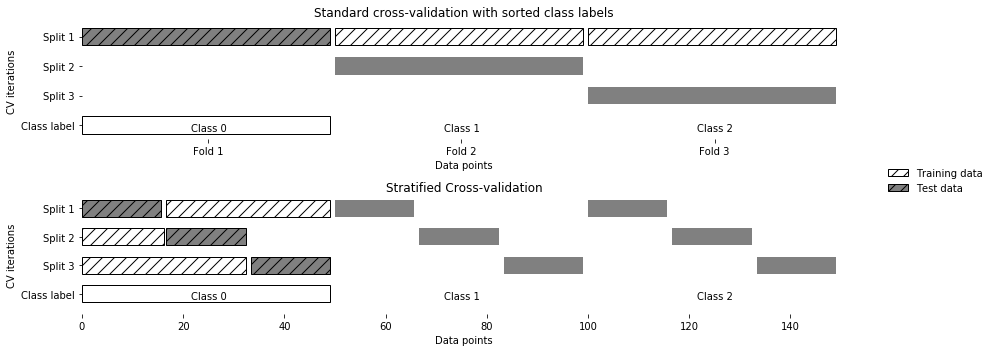

In [12]:
mglearn.plots.plot_stratified_cross_validation()
plt.show()

### 交差検証のより詳細な制御

cvに数値パラメーターを入れることで、分割回数を設定することができた。<br>
scikit-learnでは、cvに`交差検証分割機`を入れることで、データの分割をより詳細に制御することができる。

In [13]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 5)

In [14]:
print("Cross-validation scores:\n{}".format(cross_val_score(lr, iris.data, iris.target, cv = kfold)))

Cross-validation scores:
[ 1.          0.93333333  0.43333333  0.96666667  0.43333333]


In [15]:
kfold = KFold(n_splits = 3)
print("Cross-validation scores:\n{}".format(cross_val_score(lr, iris.data, iris.target, cv = kfold)))

Cross-validation scores:
[ 0.  0.  0.]


層化して分割する代わりに、データをシャッフルしてサンプルがラベル順に並ばないようにする方法も考えられる。<br>
これは、shuffleをTrueにセットすればよい。<br>
この際は、random_stateを設定しなければ、実行の都度分割の仕方が変わり、結果が変わってしまう。

In [16]:
kfold = KFold(n_splits = 3, shuffle = True, random_state = 0)

print("Cross-validation scores:\n{}".format(cross_val_score(lr, iris.data, iris.target, cv = kfold)))

Cross-validation scores:
[ 0.9   0.96  0.96]


### 一つ抜き交差検証

一つ抜き交差検証は、k分割交差検証の個々の分割が1サンプルしかないものだと考える。<br>
毎回、テストサンプルの中の1サンプルだけをテストセットとして検証する。

In [17]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(lr, iris.data, iris.target, cv = loo)
print("Number of cv itelation: {}".format(len(scores)))
print("Cross-validation :\n{}".format(scores))
print("Cross-validation accuracy: {}".format(scores.mean()))

Number of cv itelation: 150
Cross-validation :
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  0.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  0.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.]
Cross-validation accuracy: 0.9533333333333334


### シャッフル分割交差検証

シャッフル分割交差検証では、毎回train_size個のデータを選び出して訓練セットとして<br>
別にtest_size個のデータを選び出してテストセットとする。

- 訓練セットサイズ5, テストセットサイズ2, 4分割

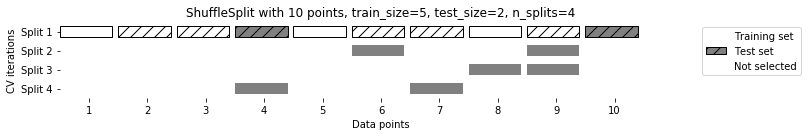

In [18]:
mglearn.plots.plot_shuffle_split()
plt.show()

In [23]:
from sklearn.model_selection import ShuffleSplit
shsp = ShuffleSplit(test_size = 5, train_size = 5, n_splits = 10)

scores = cross_val_score(lr, iris.data, iris.target, cv = shsp)

print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[ 0.8  0.4  0.4  0.4  0.   0.8  0.6  0.8  0.8  0.8]


ShuffleSplitにも層化バージョンがあり、StratifiedShuffleSplitという名前がついている。<br>
これは、クラス分類タスクにおいてはより信頼できる結果を得られる。

### グループ付き交差検証

グループ付き交差検証とは、データセットの中に密接に関係するグループがある場合に用いる交差検証の設定<br>

In [20]:
from sklearn.model_selection import GroupKFold

X, y = make_blobs(n_samples = 12, random_state = 0)

groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(lr, X, y, groups, cv = GroupKFold(n_splits = 3))

print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[ 0.75        0.8         0.66666667]


In [24]:
mglearn.plots.plot_label_kfold()
plt.show()

AttributeError: module 'mglearn.plots' has no attribute 'plot_label_kfold'

# グリッドサーチ

グリッドサーチとは、モデルのパラメータを調整し、汎化性能を向上させる方法。

## 単純なグリッドサーチ

In [25]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)

print("Size of training set:{} size of test set :{}".format(X_train.shape[0], X_test.shape[0]))

Size of training set:112 size of test set :38


In [26]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma = gamma, C = C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_parameters = {"C": C, "gamma": gamma}

print("Best score : {:.3f}".format(best_score))
print("Best parametors :{}".format(best_parameters))

Best score : 0.974
Best parametors :{'C': 100, 'gamma': 0.001}


## パラメータの過剰適合の危険性と検証セット

以上の方法では、モデルのパラメータ調節のためにテストセットを用いてしまったため、汎化性能の測定ができない。<br>

この問題を解決するために、<br>
1.モデルを構築するための「訓練セット」<br>
2.モデルのパラメータを選ぶための「検証セット」<br>
3.モデルの性能を評価するための「テストセット」<br>

に分ける方法を見てみる。

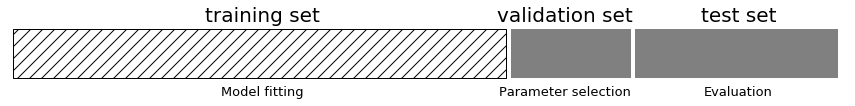

In [9]:
mglearn.plots.plot_threefold_split()
plt.show()

In [27]:
from sklearn.svm import SVC

- 訓練＋検証セットとテストセットに分ける

In [32]:
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state = 0)

- 訓練＋検証セットを、訓練セットと検証セットに分ける

In [33]:
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state = 0)

In [34]:
print("Size of training set: {}".format(X_train.shape))
print("Size of validation set: {}".format(X_valid.shape))
print("Size of test set: {}".format(X_test.shape))

Size of training set: (84, 4)
Size of validation set: (28, 4)
Size of test set: (38, 4)


訓練セット：84，検証セット：28，テストセット：38

In [35]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)

        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on validation set: 1.00
Best parameters:  {'C': 100, 'gamma': 0.001}
Test set score with best parameters: 0.97


## 交差検証を用いたグリッドサーチ

In [36]:
import numpy as np

In [37]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma = gamma, C = C)
        scores = cross_val_score(svm, X_trainval, y_trainval, cv = 5)
        #交差検証のスコアの平均値を計算
        score = np.mean(scores)
        
        if score > best_score:
            best_score = score
            best_parameters = {"C": C, "gamma": gamma}
            
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)

print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on validation set: 1.00
Best parameters:  {'C': 100, 'gamma': 0.001}
Test set score with best parameters: 0.97


/Users/ryo/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/ryo/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/ryo/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/ryo/anaconda3/lib/python3.6/site

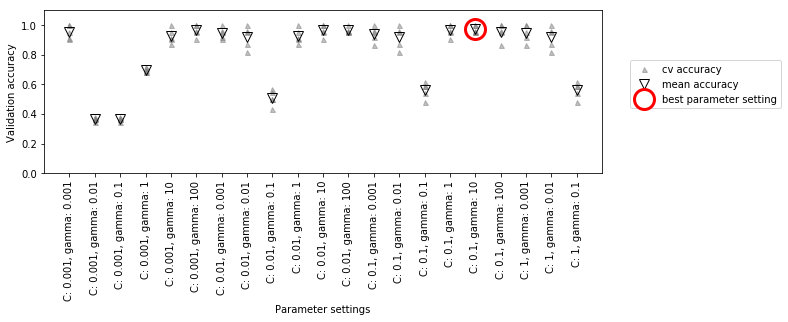

In [38]:
mglearn.plots.plot_cross_val_selection()
plt.show()

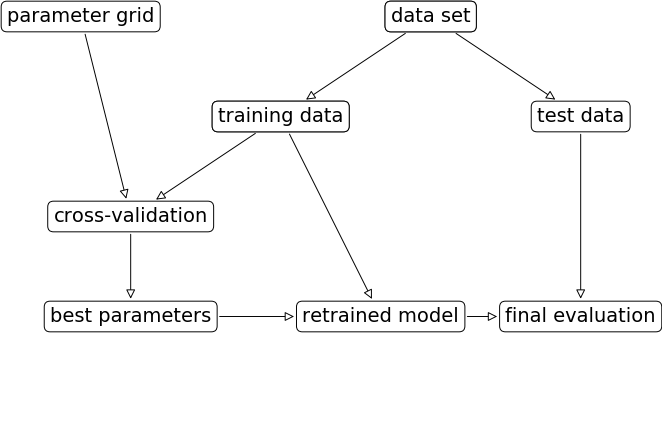

In [38]:
mglearn.plots.plot_grid_search_overview()
plt.show()

交差検証を用いたグリッドサーチをする際に、sklearnはGridSearchクラスを用意している。

GridSearchクラスを使うには、ディクショナリを用いる。<br>
キー: パラメータ名<br>
値: 試したい値<br>
    
のようにして用いる。

In [39]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [40]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(SVC(), param_grid, cv = 5)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)

In [42]:
grid_search.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


見つけたパラメータは、best_parms_属性<br>
交差検証精度に関しては、best_score_属性<br>
に格納されている。

In [71]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross_validation_score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.01}
Best cross_validation_score: 0.97


最良のパラメータと訓練セット全体を用いて訓練したモデルには、best_estimator_属性を用いてアクセスする。

In [72]:
print("Best estimator: \n{}".format(grid_search.best_estimator_))

Best estimator: 
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


### 交差検証の結果の解析

In [43]:
import pandas as pd

results = pd.DataFrame(grid_search.cv_results_)

display(results.head())

/Users/ryo/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/ryo/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/ryo/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/ryo/anaconda3/lib/python3.6/site

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.000965,0.000344,0.366071,0.366079,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000072,0.000011,0.011371,0.002852
1,0.000896,0.000396,0.366071,0.366079,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000119,0.000068,0.011371,0.002852
2,0.000752,0.000335,0.366071,0.366079,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000066,0.000081,0.011371,0.002852
3,0.000699,0.000298,0.366071,0.366079,0.001,1,"{'C': 0.001, 'gamma': 1}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000058,0.000033,0.011371,0.002852
4,0.000714,0.000283,0.366071,0.366079,0.001,10,"{'C': 0.001, 'gamma': 10}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000098,0.000030,0.011371,0.002852


- 平均交差検証のスコアをCとgammaの関数としたヒートマップ

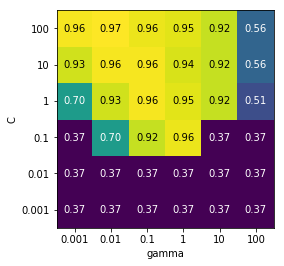

In [48]:
scores = np.array(results.mean_test_score).reshape(6, 6)

mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap="viridis")
plt.show()

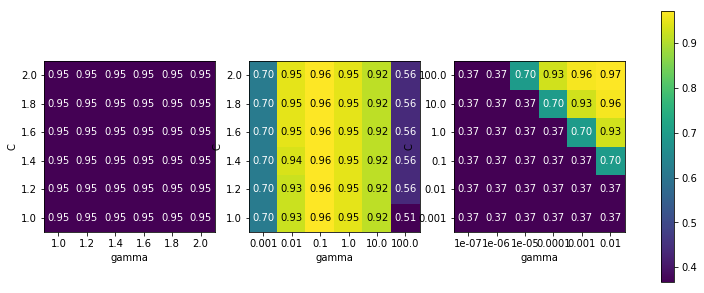

In [49]:
# 不適切なグリッドサーチ
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                      'gamma':  np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                    'gamma':  np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                           param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap="viridis", ax=ax)

plt.colorbar(scores_image, ax=axes.tolist())
plt.show()

### グリッドでないサーチ空間

GridSearchCVには、param_gridとしてディクショナリのリストを受け付けるようになっている

In [54]:
param_grid = [
    {'kernel': ['rbf'],
     'C': [0.001, 0.01, 0.1, 1, 10, 100],
     'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
    },
    {'kernel': ['linear'],
       'C': [0.001, 0.01, 0.1, 1, 10, 100]
    }
]

print("List of grids1:\n{}".format(param_grid[0]))
print("List of grids2:\n{}".format(param_grid[1]))

List of grids1:
{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
List of grids2:
{'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}


In [55]:
grid_search = GridSearchCV(SVC(), param_grid, cv = 5)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 0.97


In [56]:
results = pd.DataFrame(grid_search.cv_results_)

display(results.T)

/Users/ryo/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/ryo/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/ryo/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/ryo/anaconda3/lib/python3.6/site

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.00087285,0.000735283,0.00074439,0.000878048,0.000893879,0.000799274,0.000718689,0.000773048,0.00100946,0.00102715,...,0.000385952,0.000902843,0.000937796,0.000825214,0.000478315,0.000497723,0.000357056,0.000357342,0.000317383,0.000393534
mean_score_time,0.00037055,0.000341558,0.000321722,0.000357151,0.000379515,0.000342703,0.000310373,0.000361347,0.00044384,0.000460005,...,0.000220394,0.000387526,0.000302982,0.000255442,0.000222158,0.000324631,0.000213385,0.000211382,0.000195599,0.000235987
mean_test_score,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,...,0.955357,0.946429,0.919643,0.5625,0.366071,0.848214,0.946429,0.973214,0.964286,0.964286
mean_train_score,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,...,0.988788,1,1,1,0.366079,0.855069,0.966538,0.984368,0.988813,0.993258
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
rank_test_score,27,27,27,27,27,27,27,27,27,27,...,9,11,17,24,27,21,11,1,3,3
split0_test_score,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,...,0.958333,0.916667,0.875,0.541667,0.375,0.916667,0.958333,1,0.958333,0.958333


### ネストした交差検証

GridSearchCVを用いると，データを訓練セットとテストセットに一度だけ分ける．その為，データの一度だけの分割に結果が依存してしまう．
その為，元のデータを一度だけ訓練セットとテストセットに分けるのではなく，交差検証で何度も分割する．この手法を`ネストした交差検証`と呼ぶ．

ネストした交差検証では，外側にループを設け，そこでデータを訓練セットとテストセットに分割し，外側ループのそれぞれの分割に対して最良のパラメータを見つけ，最良のセッティングでテストセットを評価する．

In [57]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
}
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),iris.data, iris.target, cv=5)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [ 0.96666667  1.          0.96666667  0.96666667  1.        ]
Mean cross-validation score:  0.98


In [58]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []

    for training_samples, test_samples in outer_cv.split(X, y):

        best_parms = {}
        best_score = -np.inf

        for parameters in parameter_grid:

            cv_scores = []

            for inner_train, inner_test in inner_cv.split(X[training_samples], y[training_samples]):
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])

                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)

            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                best_score = mean_score
                best_params = parameters

        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])

        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [59]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold

scores = nested_cv(iris.data, iris.target, StratifiedKFold(5),StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 0.96666667  1.          0.96666667  0.96666667  1.        ]


# 評価基準とスコア

## 最終的な目的を見失わないこと

- `ビジネス評価基準`: 機械学習の基準を選ぶ前に，そのアプリケーションの高レベルの目的
- `ビジネスインパクト`: 機械学習アプリケーションに対して，特定のアルゴリズムを選択した結果

## 2クラス分類における基準

### エラーの種類

- `偽陽性`: 陰性のものを陽性と間違えること
- `偽陰性`: 陽性のものを陰性と間違えること

例) 癌を陽性としたとき，偽陽性は健康的な人を癌と判断すること，偽陰性は癌患者を健康と判断すること

この場合偽陰性が出るのは可能な限り避けるべき

### 偏ったデータセット

In [3]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 0)

In [4]:
from sklearn.dummy import DummyClassifier
import numpy as np
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)

print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [False]
Test score: 0.90


全部falseと予測してるのに90%の精度が出る

In [14]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Test score: 0.92


- ロジスティック回帰と比較をしてみる

In [6]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy score: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

dummy score: 0.78
logreg score: 0.98


### 混同行列

In [9]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[401   2]
 [  8  39]]


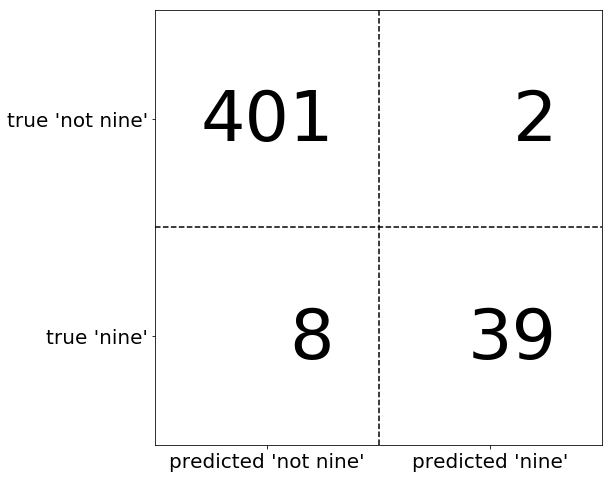

In [12]:
mglearn.plots.plot_confusion_matrix_illustration()
plt.show()

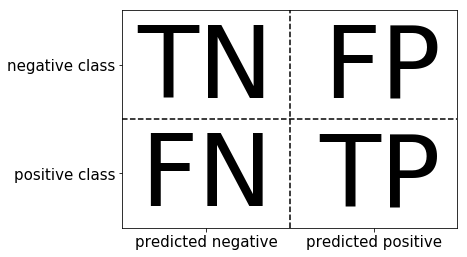

In [13]:
mglearn.plots.plot_binary_confusion_matrix()
plt.show()

- `TN`: true negative
- `FP`: false positive
- `FN`: false negative
- `TP`: true positive

In [15]:
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[361  42]
 [ 43   4]]

Decision tree:
[[390  13]
 [ 24  23]]

Logistic Regression
[[401   2]
 [  8  39]]


`精度(Accuracy)`

\begin{equation}
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
\end{equation}

`適合率(Precision)`

陽性と予測されたものがどのくらい実際に陽性であったかの測定．
偽陽性の数を制限したいときに用いる．

\begin{equation}
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
\end{equation}

`再現率(Recall)`

実際に陽性のサンプルのうち陽性と予測されたものの割合
偽陰性の数を制限したいときに用いる．

例)癌判断

\begin{equation}
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
\end{equation}

`F値`

適合率と再現率の双方を取り入れている

\text{F} = 2 \cdot \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}
\end{equation}

In [16]:
from sklearn.metrics import f1_score

In [17]:
print("f1 score most frequent: {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("f1 score dummy: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1 score tree: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1 score logistic regression: {:.2f}".format(f1_score(y_test, pred_logreg)))

f1 score most frequent: 0.00
f1 score dummy: 0.09
f1 score tree: 0.55
f1 score logistic regression: 0.89


/Users/ryo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


適合率、再現率、f-1値をまとめた包括的なレポートを得るには、classification_report関数を用いればいい

- most_frequent

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_most_frequent,
                            target_names = ["not nine", "nine"]))

             precision    recall  f1-score   support

   not nine       0.90      1.00      0.94       403
       nine       0.00      0.00      0.00        47

avg / total       0.80      0.90      0.85       450



/Users/ryo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


- pred_dummy

In [19]:
print(classification_report(y_test, pred_dummy,target_names=["not nine", "nine"]))

             precision    recall  f1-score   support

   not nine       0.89      0.90      0.89       403
       nine       0.09      0.09      0.09        47

avg / total       0.81      0.81      0.81       450



- LogisticRegression

In [20]:
print(classification_report(y_test, pred_logreg,target_names=["not nine", "nine"]))

             precision    recall  f1-score   support

   not nine       0.98      1.00      0.99       403
       nine       0.95      0.83      0.89        47

avg / total       0.98      0.98      0.98       450



### 不確実性を考慮に入れる

- 陰性:400，陽性:50　の偏った分類タスクを見る

In [4]:
from mglearn.datasets import make_blobs
from sklearn.svm import SVC

X, y = make_blobs(n_samples = (400, 50), centers = 2, cluster_std = [7.0, 2], \
                  random_state = 22)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
svc = SVC(gamma = .05).fit(X_train, y_train)

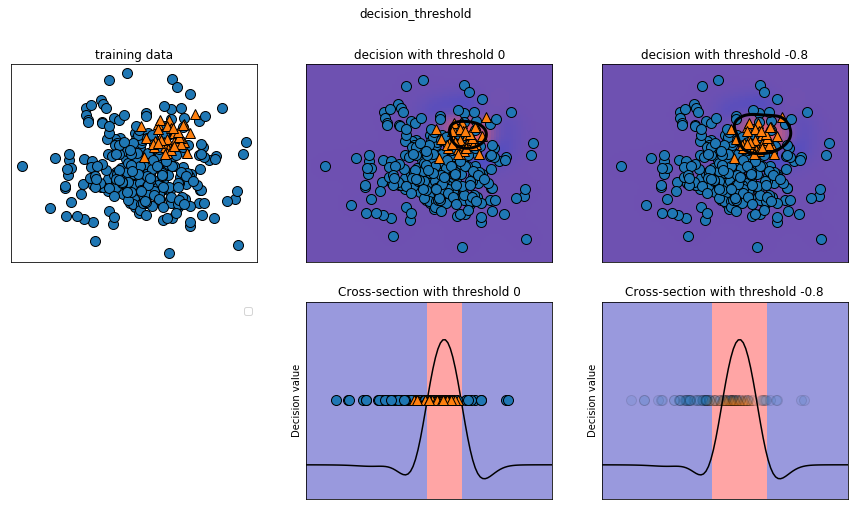

In [29]:
mglearn.plots.plot_decision_threshold()
plt.show()

In [30]:
print(classification_report(y_test, svc.predict(X_test)))

             precision    recall  f1-score   support

          0       0.97      0.89      0.93       104
          1       0.35      0.67      0.46         9

avg / total       0.92      0.88      0.89       113



クラス0の数が多すぎるために、クラス1の分類が疎かになり、精度がとても低い。<br>

FPが増えても構わないから、TPを獲得したい。そうすれば、recallの値が高くなる。<br>

よって、より多くのポイントがクラス1に分類されるように決定関数のスレッショルドを下げる<br>
(陽性と判断されるものの数が増える)

In [34]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [35]:
print(classification_report(y_test, y_pred_lower_threshold))

             precision    recall  f1-score   support

          0       1.00      0.82      0.90       104
          1       0.32      1.00      0.49         9

avg / total       0.95      0.83      0.87       113



recallは上がり、precisionは下がった。

### 適合率 -再現率カーブとROCカーブ

高い再現率をクラス分類器に要請し設定することを作動ポイントの設定と呼ぶ。

新しいモデルを開発する際、どこが作動ポイントとなるかが分からないため、<br>
- 全ての可能なスレッショルド(可能な適合率と再現率の組み合わせ)

を同時に見たい。

このために用いられるのは、`適合率-再現率カーブ`

In [5]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))

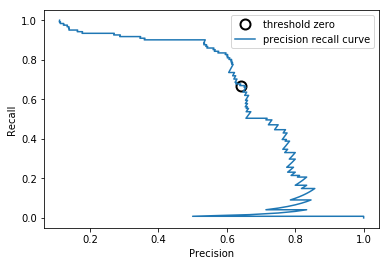

In [9]:
import numpy as np

X, y = make_blobs(n_samples = (4000, 500), centers = 2,
                  cluster_std = [7.0, 2], random_state = 22)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

svc = SVC(gamma = .05).fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.show()

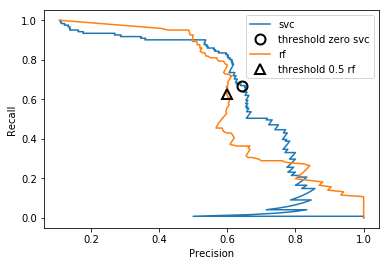

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label="svc")

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero svc", fillstyle="none", c='k', mew=2)

plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k', 
         markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.show()

カーブの情報を、特定のスレッショルドや作動ポイントによらずにまとめる方法として`平均適合率`というものがある。

In [17]:
print("f1_score of random forest: {:.3f}".format(f1_score(y_test, rf.predict(X_test))))
print("f1_score of svc: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

f1_score of random forest: 0.610
f1_score of svc: 0.656


In [18]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Average precision of random forest: {:.3f}".format(ap_rf))
print("Average precision of svc: {:.3f}".format(ap_svc))

Average precision of random forest: 0.660
Average precision of svc: 0.666


### ROCとAUC

ROCは偽陽性率を真陽性率に対してプロットする

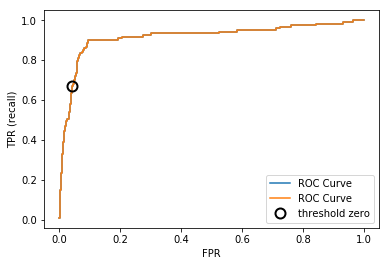

In [21]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.show()

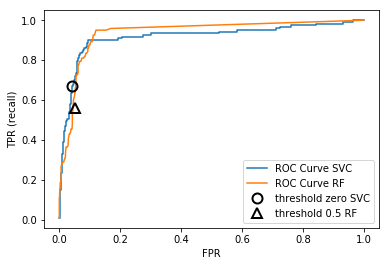

In [22]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="threshold zero SVC", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10, label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)
plt.show()

In [23]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC for Random Forest: {:.3f}".format(rf_auc))
print("AUC for SVC: {:.3f}".format(svc_auc))

AUC for Random Forest: 0.937
AUC for SVC: 0.916


In [24]:
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    print("gamma = {:.2f}  accuracy = {:.2f}  AUC = {:.2f}".format(gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")
plt.show()

NameError: name 'digits' is not defined